# Bias and Variance / Sesgo y Varianza  

# Underfitting and Overfitting/ Sub-ajuste y Sobreajuste

El sesgo y la varianza tienen una definición especial dentro del argot de *Machine Learning* y están intimamente relacionados con el overfitting y el underfitting. Revisémoslo con un ejemplo de ratones flacos y gordos.

<img src="Imagenes/RF1.jpg">

* Pesos y alturas de ratones. A medida que el peso de los ratones aumenta, el ratón es más grande. No obstante hay un punto donde los ratones ya no crecen, sólo se hacen más obesas
* En azul tenemos el conjunto de entrenamiento
* En verde tenemos el conjunto de prueba
* Nuestro objetivo es generar un modelo que, sabiendo el peso, prediga la altura.

<img src="Imagenes/RF2.jpg">

Claramente la tendencia de los datos es un arco de curva, si tratamos de resolver el problema con una regresión lineal, una recta NUNCA va a poder capturar la tendencia de los datos porque sin importar que parámetros escojamos, por la naturaleza del modelo, la recta nunca va curvarse. 

La inhabilidad de un modelo de *Machine Learning* para capturar la tendencia de los datos recibe el nombre de **sesgo** (***bias***) por lo que un modelo de regresión lineal ajustado a estos datos tiene un sesgo alto.

<img src="Imagenes/RF3.jpg">

Por el contrario, si ajustaramos un polinomio de grado siete (o algo así) a nuestros datos, de manera que la curva toque a TODOS los puntos del conjunto de entrenamiento tendríamos un sesgo súper súper pequeño.

<img src="Imagenes/RF4.jpg">

Para calcular el sesgo numéricamente, bastaría con calcular la suma de las distancia de los puntos a la curva del modelo. En este caso, queda claro que el sesgo del polinomio de grado 7 es cero y el de la recta es algo mayor a cero, por lo que el segundo modelo es "mejor" ajustándose a los datos de entrenamiento.

Recordemos que hasta ahora sólo hemos trabajado con el conjunto de entrenamiento. Si nosotros le pasamos un nuevo dataset a los modelos para que haga predicciones y evaluamos su performance:

<img src="Imagenes\RF5.jpg" >

En este caso, el modelo con menor error fue la regresión lineal. 

<img src="Imagenes/RF6.jpg">

Nuestro polinomio de grado 7 hizo un excelente trabajo en el conjunto de entrenamiento (sesgo cero), pero tuvo un performance terrible en el conjunto de prueba. Esto se debe a que, en el entrenamiento, el modelo no sólo capturó la tendencia de los datos sino que además se está modelando el ruido particular asociado a este conjunto. Si le pasamos a nuestro modelo un conjunto de prueba diferente, nos dará un error diferente al obtenido con el primer conjunto de prueba. Un modelo de Machine Learning que varía este error significativamente dependiendo de con qué conjunto de prueba se evalúe se dice que tiene una alta **varianza**.

Adicional a esto, dado que este modelo se ajusta perfectamente al conjunto de entrenamiento, pero no al de prueba se dice que estamos cayendo en **overfitting** (sobreajuste).

<img src = "Imagenes/RF7.jpg">

En contraste, la regresión lineal presenta un sesgo alto ya que no captura la tendencia de los datos, pero una varianza baja, ya que el error asociado a diferentes conjuntos de prueba será más o menos el mismo.

Adicional a esto, dado que el modelo no está captando la tendencia real de los datos, decimos que estamos cayendo en **underfitting** (sub-ajuste).

El modelo de *Machine Learning* tiene bajo sesgo y baja varianza como se muestra en la siguiente imagen:

<img src="Imagenes/RF8.jpg">

No obstante reducir el sesgo implica aumentar la varianza y vice-versa, por lo que el objetivo del científico de datos es encontrar el "intercambio" adecuado entre varianza y sesgo de manera que se construya el mejor modelo posble (*bias-variance trade-off*).

<img src="Imagenes/RF9.jpg">

En resumen, el modelo "perfecto" está en un punto intermedio entre estos dos modelos.

## Ensemble Learning / Combinación de Aprendizaje 

Desventajas de los árboles de decisión:

* No son robustos: pequeños cambios en el conjunto de entrenamiento cambian significativamente el árbol lo que puede producir una predicción final diferente.

* Susceptible a overfitting.

<img src="Imagenes/RF10.png" alt="drawing" width="500"/>>

¿Cómo se ve el *overfitting* en un árbol clasificador?

<img src="Imagenes/RF11.jpg" alt="drawing" width="500"/>>

Estas cajas verdes dentro de las zonas rojas son culpa del *overfitting*, son generadas por *outliers*, de nuevo, por culpa del perro que parece gato que cae dentro de esta zona, el árbol, en su afán por clasificarlo bien, se ve forzado a crear esta caja verde dentro de la zona roja y si tenemos la mala fortuna de que un gato caiga ahí será clasificado como perro.

<img src="Imagenes/RF12.png" width = 600>

* Preferencia por fronteras de decisión ortogonales: susceptibles a rotaciones en los datos.

<img src="Imagenes/rf20.jpg" alt="drawing" width="500"/>>

¿Por qué a pesar de todas estas desventajas los árboles de decisión están de "moda"?

* Ensemble Learning: proceso por el cual múltiples modelos son estratégicamente generados y combinados para resolver un problema.

Ejemplo: resolver el problema de clasificación del Titanic (vive o muere) por medio de Regresión Logística, Bosque Aleatorio y SVM. La predicción final sería el promedio de las predicciones de los tres modelos.

La idea detrás de esto es que, como los algoritmos aprenden de maneras diferentes, el promedio de sus predicciones condensará el aprendizaje de cada uno de ellos y, en teoría, la predicción promedio será mejor que la predicción de los modelos por separado (*wisdom of the crowd*).

Random Forrest es un ensamble de árboles de decisión.

<img src="Imagenes/rf30.jpg" alt="drawing" width="300"/>>

### Random Forrest: Teoría

A grandes rasgos Random Forrest opera de la siguiente manera:

* Entrena un N número de árboles de decisión con muestreos aleatorios del training set.
* Promedia la predicción de todos los árboles y el resultado es la predicción final del algoritmo. 

Cuando el muestreo se lleva acabo CON REMPLAZO recibe el nombre de bagging.

<img src="Imagenes/rf40.jpg" alt="drawing" width="700"/>

Si el muestreo se lleva acabo SIN REMPLAZO recibe el nombre de pasting.

Por último cabe señalar que no se entrena a cada árbol con TODAS las variables del dataset, sino con un conjunto aleatorio de ellas. Esto buscando tener el mayor número de clasificadores diferentes posibles.

Ventajas del algoritmo:

* Puede usarse tanto para clasificación y regresión.

* Puede visualizar la importancia relativa de variables.

* Los hiperparámetros usados por defecto por lo general llevan a buenas predicciones.

* Difícil que caigan en overfitting.


No obstante, un gran número de árboles hacen al algoritmo lento e ineficiente para problemas de la vida real.

### Random Forrest: Práctica

El objetivo de la clase de hoy será hacer un proyecto de *Machine Learning* de principio a fin con la metodología que se revisó al principio de esta parte del curso. Para tal objetivo recurriremos a los datos del Titanic con los que trabajamos en las primeras clases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier

----------------------------------------------------------
#### 1. Observación a gran escala

¿Cuál es el objetivo del proyecto?

Entrenar un clasificador que determine si un pasajero abordo del titanic sobrevivió o falleció durante la catástrofe.

---------------------------

#### 2. Recolección de datos

Descargamos los datos directamente de [Kaggle](https://www.kaggle.com) a nuestro ordenador. En este caso, el concurso ya tiene por default un conjunto de entrenamiento (train) y otro de prueba (test) por lo que no será necesario hacer la partición como hemos hecho antes (porque ya está hecha).

In [2]:
train = pd.read_csv('Datos/titanic_train.csv')
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
test = pd.read_csv('Datos/titanic_test.csv')
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


Notemos que falta la variable objetivo en el conjunto de prueba, esta se encuentra en otro dataset aparte que también descargamos de la página:

In [4]:
submission = pd.read_csv('Datos/gender_submission.csv')
submission.head(2)

,PassengerId,Survived
0,892,0
1,893,1


Vamos a pegarle test la columna de supervivencia:

In [5]:
test['Survived'] = submission['Survived']

---------------------
#### 3. Analizar, visualizar y hacer minería de datos para obtener insights (clave para el negocio)

AED (Análisis Exploratorio Descriptivo) se recomienda que se haga en el conjunto de entrenamiento:

* Correlaciones
* Datos nulos
* Intuición de los datos (qué esperas obtener del modelo) 
* Estadística Descriptiva (ya la hicimos en la clase 2)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Diccionario de datos:

* PassengerId: número de identificación de cada pasajero.
* Survived: indica si el pasajero sobrevivió (1) o no (0).
* Pclass: 1a, 2a o 3a clase
* Name: Nombre completo del pasajerx
* Sex: Sexo del pasajerx
* Age: Edad del pasajerx
* SibSp: Número de hermanos o pareja abordo
* Parch: Número de padres o hijos abordo
* Ticket: Identificador del ticket 
* Fare: Precio que pagó el pasajero por el ticket
* Cabin: Cabina en la que iba viajando 
* Embarked: El puerto en el que se embarcó el/la pasajerx: C - Cherbourg, S - Southampton, Q = Queenstown

Revisemos si hay datos nulos:

In [11]:
print('Valores nulos en conjunto de entrenamiento:')
train.isnull().sum()[train.isnull().sum() > 0]

Valores nulos en conjunto de entrenamiento:


Age         177
Cabin       687
Embarked      2
dtype: int64

In [10]:
print('Valores nulos en conjunto de prueba:')
test.isnull().sum()[test.isnull().sum() > 0]

Valores nulos en conjunto de prueba:


Age       86
Fare       1
Cabin    327
dtype: int64

Correlaciones:

In [12]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

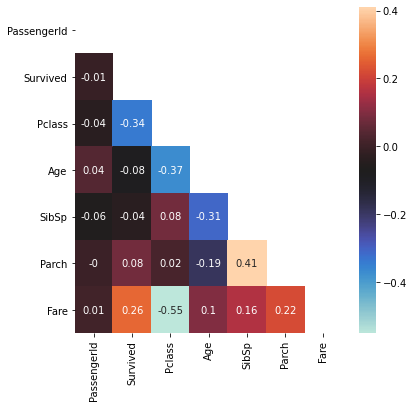

In [13]:
plt.figure(figsize=(6,6))
sbn.heatmap(train.corr().round(decimals=2), annot= True, cmap = "icefire", mask = mask);

¿Se preocuparían por problemas de multicolinealidad en algunas de las variables predictoras?

## INSERTA AQUÍ TUS GRÁFICAS DE BARRAS, AGRUPADOS Y DEMÁS...

-----------------------------------------
#### 4. Preparar los datos para el/los algoritmos de ML


* Fechas
* Limpieza de datos
* Generación de variables
* Tratamiento de variables Categóricas

Primero veamos los valores nulos presentes en el dataset:

In [14]:
t = train.isnull().sum().sort_values(ascending=False)/len(train)
(t[t>0] * 100)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

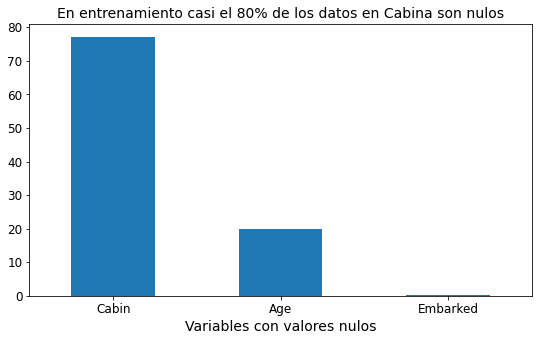

In [15]:
plt.figure(figsize = (9,5))
(t[t>0] * 100).plot.bar(rot = 0)
plt.title('En entrenamiento casi el 80% de los datos en Cabina son nulos', fontsize = 14)
plt.xlabel('Variables con valores nulos', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [16]:
t = test.isnull().sum().sort_values(ascending=False)/len(test)
(t[t>0] * 100)

Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64

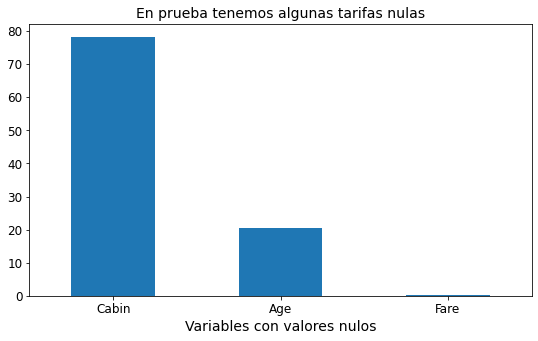

In [17]:
plt.figure(figsize = (9,5))
(t[t>0] * 100).plot.bar(rot = 0)
plt.title('En prueba tenemos algunas tarifas nulas', fontsize = 14)
plt.xlabel('Variables con valores nulos', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

Veamos que hacer con estos valores nulos.

Primero revisemos *Fare* y *Embarked*.

In [18]:
t = test.isnull().sum().sort_values(ascending=False)/len(test)
(t[t>0] * 100)

Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64

Tenemos 0.23% de valores nulos y es una variable de tipo numérica. ¿Con qué valor numérico creen que sea pertinente remplazar estos valores?

In [19]:
t = train.isnull().sum().sort_values(ascending=False)/len(train)
(t[t>0] * 100)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

Tenemos 0.22% de valores nulos en *Embarked* y es una variable de tipo categórica. ¿Con qué valor numérico creen que sea pertinente remplazar estos valores?

En cuánto a la variable de Edad, ¿con qué valor numérica convendría remplazarla? ¿Con la media o con la mediana?

In [20]:
print("Valor promedio de la edad es:", round(train['Age'].mean(),1))

Valor promedio de la edad es: 29.7


In [21]:
print("Mediana de la edad es:", train['Age'].median())

Mediana de la edad es: 28.0


Ahora revisemos la cabina:

In [23]:
print("Número de valores posibles en variable Cabina:", train['Cabin'].nunique())

Número de valores posibles en variable Cabina: 147


In [24]:
train['Cabin'].value_counts(normalize = True)

B96 B98        0.019608
C23 C25 C27    0.019608
G6             0.019608
C22 C26        0.014706
E101           0.014706
                 ...   
E36            0.004902
F E69          0.004902
C7             0.004902
B78            0.004902
A6             0.004902
Name: Cabin, Length: 147, dtype: float64

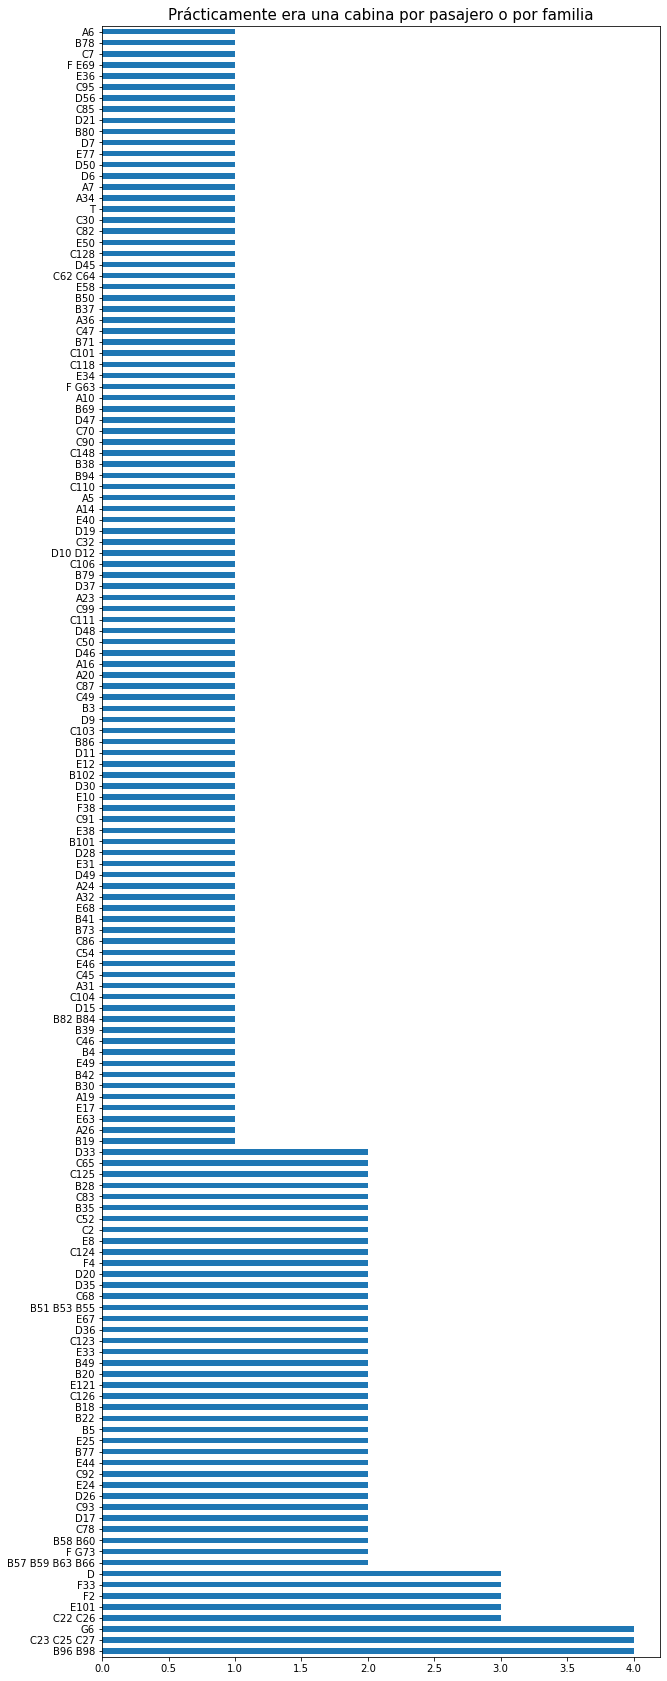

In [25]:
plt.figure(figsize=(10,30))
train['Cabin'].value_counts(normalize = False).plot.barh()
plt.title("Prácticamente era una cabina por pasajero o por familia", fontsize = 15);

Hacer una variable por cabina no tendría sentido alguno, pues a lo mucho 4 pasajeros viajaban en una cabina y además el 70% de los pasajeros no tenía cabina. Lo que podríamos hacer es cambiar esta variable a "El pasajero tenía cabina o no tenía cabina". Vamos a hacerlo:

In [26]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [27]:
lista = ['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148']

In [28]:
train['Cabin'].replace(lista, 1)

0      NaN
1      1.0
2      NaN
3      1.0
4      NaN
      ... 
886    NaN
887    1.0
888    NaN
889    1.0
890    NaN
Name: Cabin, Length: 891, dtype: float64

In [29]:
train['Cabin'].replace(lista, 1, inplace = True)

In [30]:
train['Cabin'].fillna(0)

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Cabin, Length: 891, dtype: float64

In [31]:
train['Cabin'].fillna(0, inplace = True)

In [32]:
train['Cabin']

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Cabin, Length: 891, dtype: float64

Nuestra variable cabina ahora es si el pasajero tenía cabina o no.

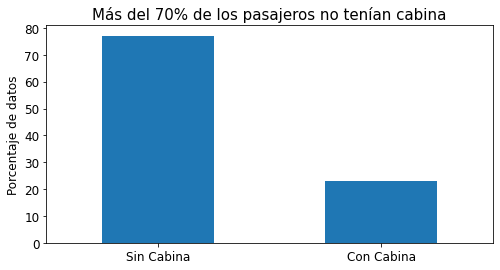

In [33]:
plt.figure(figsize = (8,4))
(train['Cabin'].value_counts(normalize= True) * 100).plot.bar(rot = 0)
plt.title('Más del 70% de los pasajeros no tenían cabina', fontsize = 15)
plt.ylabel('Porcentaje de datos', fontsize = 12)
plt.xticks([0, 1], ['Sin Cabina', 'Con Cabina'], fontsize = 12)
plt.yticks(fontsize = 12);

Esto sí podría servirle al modelo.

Haciendo exactamente lo mismo para el conjunto de prueba:

Hay que generar la lista de nuevo, pues podría ser que haya cabinas en prueba que no estuvieran en entrenamiento:

In [34]:
test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [35]:
lista = ['B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105']

In [36]:
test['Cabin'].replace(lista, 1)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
413    NaN
414    1.0
415    NaN
416    NaN
417    NaN
Name: Cabin, Length: 418, dtype: float64

In [37]:
test['Cabin'].replace(lista, 1, inplace = True)
test['Cabin'].fillna(0, inplace = True)

In [38]:
test['Cabin'].value_counts()

0.0    327
1.0     91
Name: Cabin, dtype: int64

Arreglado.

# EJERCICIO

Rellenar los valores nulos del dataframe (entrenamiento y prueba) siguiendo las siguientes instrucciones:

* Remplazar los valores nulos en edad por la mediana
* Remplazar los valores nulos de Embarked por la moda
* Remplazar los valores nulos de Fare (sólo existen nulos en prueba) por la mediana.

In [39]:
train['Age'].fillna(train['Age'].median(),inplace = True)
test['Age'].fillna(test['Age'].median(),inplace = True)

train['Embarked'].fillna(train['Embarked'].mode()[0],inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace = True)

test['Fare'].fillna(test['Fare'].median(),inplace = True)

Ahora pasemos a tratar las variables categóricas:

In [40]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,0.0,S


¿Cuáles de estas variables pueden ser consideradas categóricas? ¿Cuáles deberíamos considerar para el modelo y cuáles no? ¿Cuáles son las variables numéricas? ¿Cuáles deberíamos de someter a un pd.get_dummies y a cuales no?

Propuestas:

In [41]:
cat = ['Sex', 'Cabin','Embarked']
num = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target = ['Survived']

El resto de las variables son innecesarias para el modelo, ¿por qué?

In [42]:
train[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Cabin     891 non-null    float64
 2   Embarked  891 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.0+ KB


Cabina está como entero. Para que *get_dummies* funcionen necesitamos que sea string:

In [43]:
train['Cabin'] = train['Cabin'].astype('object')

In [44]:
train[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Cabin     891 non-null    object
 2   Embarked  891 non-null    object
dtypes: object(3)
memory usage: 21.0+ KB


Hay que hacer lo mismo para test:

In [45]:
test['Cabin'] = test['Cabin'].astype('object')

Hagamos la transformación de variables categóricas nominales a numéricas:

In [46]:
pd.get_dummies(train[cat]).head(3)

,Sex_female,Sex_male,Cabin_0.0,Cabin_1.0,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,0,0,0,1
1,1,0,0,1,1,0,0
2,1,0,1,0,0,0,1


No olvidemos que tenemos que tirar columnas para evitar problemas de colinealidad (para el caso de algoritmos que sean susceptibles a esto):

In [47]:
categories = pd.get_dummies(train[cat], drop_first= True)
categories.head()

,Sex_male,Cabin_1.0,Embarked_Q,Embarked_S
0,1,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,1
4,1,0,0,1


Aislando las variables numéricas:

In [48]:
numeric = train[num]
numeric.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


Ahora vamos a pegar la tabla numérica y la tabla categórica para generar el *dataframe* con el que alimentaremos al modelo, es decir, generaremos nuestras variables predictoras (X):

In [49]:
X_train = pd.concat([numeric, categories], axis=1)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_1.0,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


Ahora generamos nuestra variable objetivo:

In [50]:
y_train = train['Survived']

Ahora hacemos exactamente lo mismo para test:

In [51]:
categories = pd.get_dummies(test[cat], drop_first= True)
numeric = test[num]
X_test = pd.concat([numeric, categories], axis=1)
y_test = test['Survived']

Por último crearemos nuevas variables que podrían ayudar al modelo (*feature engineering*):

In [52]:
X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1
X_train['Alone'] = 0
X_train['Alone'].loc[X_train['FamilySize'] > 1] = 1

C:\Users\TychoBrahe\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1
X_test['Alone'] = 0
X_test['Alone'].loc[X_test['FamilySize'] > 1] = 1

-------------------------------------------
#### 5. Seleccionar el modelo y entrenarlo

Como regla de dedo debemos empezar con el modelo más sencillo de todos y luego recurrir a modelos más complejos, por lo tanto, vamos a usar y a evaluar una regresión logística, luego un bosque aleatorio y por último un modelo llamado SVM que no revisamos en este curso, pero sí en la parte dos del mismo (para más información inscríbanse :V).

##### Estandarización

Vamos a usar dos modelos para los que es necesario estandarizar (Regresión Logística y SVM) y uno que no la requiere (Random Forest), que estandaricemos o no, NO le afecta a los modelos de árboles por lo que da igual si lo hacemos o no. Con eso en mente, estandaricemos.

**NO TIENE SENTIDO ESTANDARIZAR VARIABLES CATEGÓRICAS** (¿por qué?) 

Estandarizamos la parte numérica y luego peguemos los datos.

In [54]:
num = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','FamilySize', 'Alone']

In [55]:
X_num = (X_train[num]-X_train[num].mean())/(X_train[num].std())
X_num.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Alone
0,0.826913,-0.565419,0.432550,-0.473408,-0.502163,0.059127,1.230954
1,-1.565228,0.663488,0.432550,-0.473408,0.786404,0.059127,1.230954
2,0.826913,-0.258192,-0.474279,-0.473408,-0.488580,-0.560660,-0.811467
3,-1.565228,0.433068,0.432550,-0.473408,0.420494,0.059127,1.230954
4,0.826913,0.433068,-0.474279,-0.473408,-0.486064,-0.560660,-0.811467


In [56]:
X_cat = X_train.iloc[:,5:9]
X_cat.head()

,Sex_male,Cabin_1.0,Embarked_Q,Embarked_S
0,1,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,1
4,1,0,0,1


In [57]:
pd.concat([X_num, X_cat], axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Alone,Sex_male,Cabin_1.0,Embarked_Q,Embarked_S
0,0.826913,-0.565419,0.432550,-0.473408,-0.502163,0.059127,1.230954,1,0,0,1
1,-1.565228,0.663488,0.432550,-0.473408,0.786404,0.059127,1.230954,0,1,0,0
2,0.826913,-0.258192,-0.474279,-0.473408,-0.488580,-0.560660,-0.811467,0,0,0,1
3,-1.565228,0.433068,0.432550,-0.473408,0.420494,0.059127,1.230954,0,1,0,1
4,0.826913,0.433068,-0.474279,-0.473408,-0.486064,-0.560660,-0.811467,1,0,0,1


In [58]:
X_train_std = pd.concat([X_num, X_cat], axis=1)

Y hay que hacer lo mismo para X_test:

In [59]:
X_num = (X_test[num]-X_test[num].mean())/(X_test[num].std())
X_cat = X_test.iloc[:,5:9]
X_test_std = pd.concat([X_num, X_cat], axis=1)

Listo, es hora del *Machine Learning*:

##### Regresión Logística

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss
import scikitplot as skplt

In [61]:
model = LogisticRegression()
model.fit(X_train_std, y_train)

y_pred_lr = model.predict(X_test_std)

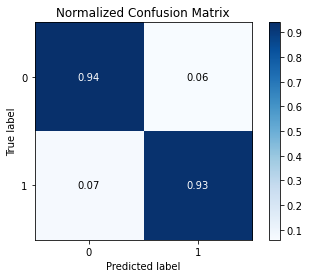

In [62]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_lr, normalize = True);

In [63]:
print('Area under the ROC curve:',"% 1.3f" % roc_auc_score(y_test,y_pred_lr))

Area under the ROC curve:  0.939


In [64]:
print('Log Loss: %1.3f' % log_loss(y_test,y_pred_lr))

Log Loss: 2.066


Nuestras métricas arrojan valores muy buenos, tenemos un modelo muy bueno.

### Bosque Aleatorio

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# tamaño grid ntrees
NT = 9
max_depth = 2
min_trees = 1
max_trees = 50
grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')


#matriz para guardar resultado de ecm
error = np.zeros((NT))
for j,ntrees in enumerate(grid_tree):
    clf = RandomForestClassifier(n_estimators= ntrees, 
                                 max_depth = max_depth, random_state = 8)

# hacer unestimación sobre train
    clf.fit(X_train, y_train)
# hagamos un predict: tst
    score = roc_auc_score(y_test, clf.predict(X_test))
# y guardemos
    error[j] = score
    print("iteracion:",
          j+1,
          "numero de arboles:",
          ntrees,
          "error:", round(score,3))

iteracion: 1 numero de arboles: 1 error: 0.912
iteracion: 2 numero de arboles: 7 error: 0.964
iteracion: 3 numero de arboles: 13 error: 0.972
iteracion: 4 numero de arboles: 19 error: 0.994
iteracion: 5 numero de arboles: 25 error: 0.909
iteracion: 6 numero de arboles: 31 error: 0.977
iteracion: 7 numero de arboles: 37 error: 0.967
iteracion: 8 numero de arboles: 43 error: 0.905
iteracion: 9 numero de arboles: 50 error: 0.869


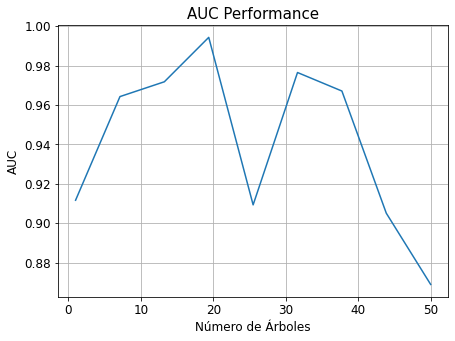

In [65]:
plt.figure(figsize=(7,5))
plt.title('AUC Performance', fontsize = 15)
plt.plot(np.linspace(min_trees, max_trees, NT), error)
plt.xlabel('Número de Árboles', fontsize = 12)
plt.ylabel('AUC', fontsize=12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True);

In [66]:
# tamaño grid ntrees
NT = 9
max_depth = 2
min_trees = 1
max_trees = 50
grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')

#matriz para guardar resultado de ecm
error = np.zeros((NT))
for j,ntrees in enumerate(grid_tree):
    clf = RandomForestClassifier(n_estimators= ntrees,
                                 max_depth = max_depth,
                                random_state = 8)

# hacer unestimación sobre train
    clf.fit(X_train, y_train)
# hagamos un predict: tst
    score = log_loss(y_test, clf.predict(X_test))
# y guardemos
    error[j] = score
    print("iteracion:",
          j+1,
          "numero de arboles:",
          ntrees,
          "error:",
          round(score,3))


iteracion: 1 numero de arboles: 1 error: 3.884
iteracion: 2 numero de arboles: 7 error: 1.57
iteracion: 3 numero de arboles: 13 error: 0.744
iteracion: 4 numero de arboles: 19 error: 0.248
iteracion: 5 numero de arboles: 25 error: 2.314
iteracion: 6 numero de arboles: 31 error: 0.661
iteracion: 7 numero de arboles: 37 error: 1.074
iteracion: 8 numero de arboles: 43 error: 3.057
iteracion: 9 numero de arboles: 50 error: 3.966


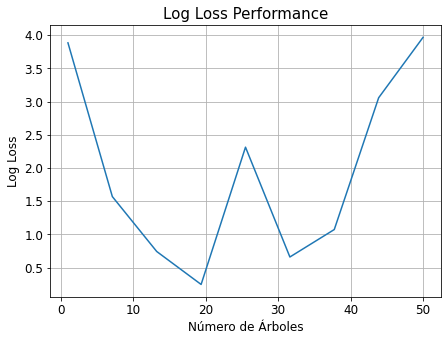

In [67]:
plt.figure(figsize=(7,5))
plt.title('Log Loss Performance', fontsize = 15)
plt.plot(np.linspace(min_trees, max_trees, NT), error)
plt.xlabel('Número de Árboles', fontsize = 12)
plt.ylabel('Log Loss', fontsize=12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True);

In [68]:
#Tamaño grid depth
ND = 4
min_depth = 1
max_depth = 4
grid_depth = np.linspace(min_depth,max_depth,ND).astype('int')
# tamaño grid ntrees
NT = 9
min_trees = 1
max_trees = 50
grid_tree = np.linspace(min_trees, max_trees, NT).astype('int')

error = np.zeros((ND,NT))

for i, max_depth in enumerate(grid_depth):
    for j,ntrees in enumerate(grid_tree):
        clf = RandomForestClassifier(n_estimators= ntrees,
                                     max_depth = max_depth,
                                    random_state = 8)

# hacer unestimación sobre train
        clf.fit(X_train, y_train)
    # hagamos un predict: tst
        score = roc_auc_score(y_test, clf.predict(X_test))
    # y guardemos
        error[i,j] = score
        print("it:",
              j+1,
              "arboles:",
              ntrees,
              "profundidad:",
              max_depth,
              "error:",
              round(score,3))

it: 1 arboles: 1 profundidad: 1 error: 0.556
it: 2 arboles: 7 profundidad: 1 error: 0.562
it: 3 arboles: 13 profundidad: 1 error: 0.598
it: 4 arboles: 19 profundidad: 1 error: 0.619
it: 5 arboles: 25 profundidad: 1 error: 0.676
it: 6 arboles: 31 profundidad: 1 error: 0.72
it: 7 arboles: 37 profundidad: 1 error: 0.704
it: 8 arboles: 43 profundidad: 1 error: 0.666
it: 9 arboles: 50 profundidad: 1 error: 0.686
it: 1 arboles: 1 profundidad: 2 error: 0.912
it: 2 arboles: 7 profundidad: 2 error: 0.964
it: 3 arboles: 13 profundidad: 2 error: 0.972
it: 4 arboles: 19 profundidad: 2 error: 0.994
it: 5 arboles: 25 profundidad: 2 error: 0.909
it: 6 arboles: 31 profundidad: 2 error: 0.977
it: 7 arboles: 37 profundidad: 2 error: 0.967
it: 8 arboles: 43 profundidad: 2 error: 0.905
it: 9 arboles: 50 profundidad: 2 error: 0.869
it: 1 arboles: 1 profundidad: 3 error: 0.896
it: 2 arboles: 7 profundidad: 3 error: 0.772
it: 3 arboles: 13 profundidad: 3 error: 0.942
it: 4 arboles: 19 profundidad: 3 error: 0

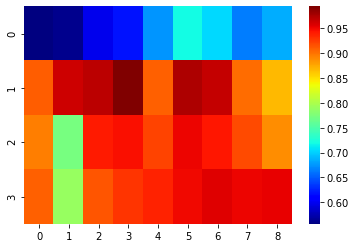

In [69]:
import seaborn as sns
sns.heatmap(error, cmap ='jet')

In [87]:
clf = RandomForestClassifier(n_estimators= 13, 
                                 max_depth = 2, 
                             random_state = 8)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=13, random_state=8)

In [88]:
y_pred_RF = clf.predict(X_test)

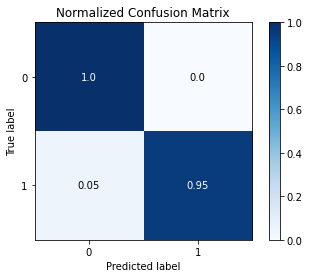

In [89]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_RF, normalize = True);

In [95]:
print('Area under the ROC curve:',"% 1.3f" % roc_auc_score(y_test,y_pred_RF))

Area under the ROC curve:  0.972


In [96]:
print('Log Loss: %1.3f' % log_loss(y_test,y_pred_RF))

Log Loss: 0.744


In [75]:
x = X_train.columns

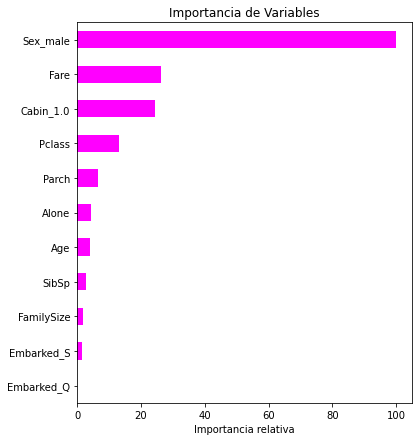

In [76]:
#DF de variables mas importantes
f_imp = pd.DataFrame(clf.feature_importances_,
                     index=x, columns=['imp'])
#calculo de importancia relativa
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)
#plot de importancia de variables
f_imp.sort_values('imp_rel',ascending=True).imp_rel.plot.barh(figsize=(6,7),
                                                              title='Importancia de Variables',color='magenta')
plt.xlabel('Importancia relativa');


#### Máquina de Soporte Vectorial 

In [77]:
from sklearn.svm import SVC

In [78]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_std,y_train)

y_pred_SVM = classifier.predict(X_test_std)

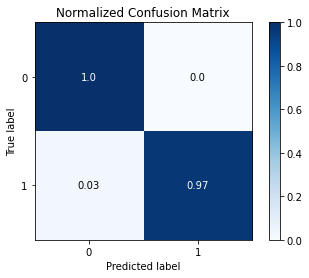

In [79]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_SVM, normalize = True)

In [80]:
print('Area bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_pred_SVM))

Area bajo la curva ROC:  0.987


In [81]:
print('Log Loss: %1.3f' % log_loss(y_test,y_pred_SVM))

Log Loss: 0.331


## Ensemble Learning

In [97]:
y_pred = (y_pred_RF + y_pred_SVM) / 2

In [98]:
y_pred = np.where(y_pred < 0.5, 0,1)

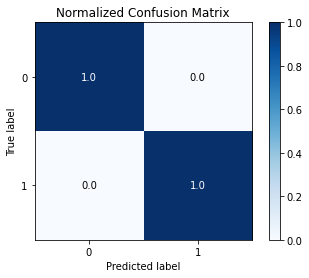

In [99]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize = True)

In [100]:
print('Area under the ROC curve:',"% 1.3f" % roc_auc_score(y_test,y_pred))

Area under the ROC curve:  0.998


In [101]:
print('Log Loss: %1.3f' % log_loss(y_test,y_pred))

Log Loss: 0.083
